In [7]:
from PIL import Image
import os

# Specify the target size
target_size = (128, 128)

# Specify the input and output directories
input_dir = 'prospace_assignment'
output_dir = 'output'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to resize .tiff images
def resize_tiff(input_path, output_path, target_size):
    try:
        # Open the .tiff image
        image = Image.open(input_path)

        # Resize the image
        resized_image = image.resize(target_size)

        # Save the resized image
        resized_image.save(output_path)

        return True
    except Exception as e:
        print(f"Error processing {input_path}: {str(e)}")
        return False

# Iterate through the input directory and resize each .tiff image
for filename in os.listdir(input_dir):
    if filename.endswith(".tiff") or filename.endswith(".tif"):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)

        # Resize the image
        success = resize_tiff(input_path, output_path, target_size)

        if success:
            print(f"Resized {filename} successfully.")
        else:
            print(f"Failed to resize {filename}.")

print("Conversion complete.")


Resized 296_2023_0.tif successfully.
Resized 264_2023_3.tif successfully.
Resized 16_2022_4.tif successfully.
Resized 175_2022_7.tif successfully.
Resized 361_2023_3.tif successfully.
Resized 371_2022_5.tif successfully.
Resized 171_2022_11.tif successfully.
Resized 183_2022_5.tif successfully.
Resized 37_2022_7.tif successfully.
Resized 348_2022_11.tif successfully.
Resized 159_2022_9.tif successfully.
Resized 354_2022_11.tif successfully.
Resized 131_2022_4.tif successfully.
Resized 338_2022_11.tif successfully.
Resized 543_2023_0.tif successfully.
Resized 114_2022_6.tif successfully.
Resized 13_2022_5.tif successfully.
Resized 473_2023_0.tif successfully.
Resized 382_2022_4.tif successfully.
Resized 122_2023_0.tif successfully.
Resized 43_2022_5.tif successfully.
Resized 375_2022_11.tif successfully.
Resized 348_2022_7.tif successfully.
Resized 256_2022_7.tif successfully.
Resized 414_2023_1.tif successfully.
Resized 50_2022_10.tif successfully.
Resized 557_2022_7.tif successfully.


In [7]:
import csv
from PIL import Image
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly 

# Specify the target size for resizing images
target_size = (64, 64)

# Specify the input directory where your images are stored
input_dir = 'output'

# Specify the output CSV file path
csv_file_path = 'predicted_labels.csv'

# List to store image arrays
data = []

# List to store image filenames
image_filenames = []

# Load and preprocess unlabeled images
for filename in os.listdir(input_dir):
    if filename.endswith(".tif") or filename.endswith(".tiff"):
        img_path = os.path.join(input_dir, filename)

        # Open image using Pillow
        img = Image.open(img_path)

        # Resize image
        img = img.resize(target_size)

        # Convert image to numpy array
        img_array = np.array(img)

        # Append to data list
        data.append(img_array)

        # Append filename to image_filenames list
        image_filenames.append(filename)

# Convert data to numpy array
X_unlabeled = np.array(data)

# Reshape the data for K-Means (flatten each image)
X_flat = X_unlabeled.reshape(X_unlabeled.shape[0], -1)

# Normalize pixel values to the range [0, 1]
X_flat_normalized = X_flat / 255.0

# Use PCA for dimensionality reduction
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_flat_normalized)

# Apply K-Means clustering
n_clusters = 3  # Set the number of clusters based on your expected classes
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Write class labels and image filenames to CSV
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Image Name', 'Predicted Class'])  # Write header
    for image, label in zip(image_filenames, labels):
        writer.writerow([image, label])

print("CSV file saved successfully.")

import plotly.express as px

# Create a DataFrame for visualization
df = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'Cluster': labels})

# Visualize the clusters using Plotly
fig = px.scatter(df, x='PC1', y='PC2', color='Cluster', title='K-Means Clustering')
fig.show()



/home/aryan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



CSV file saved successfully.


In [8]:
def assign_labels(cluster_labels):
    # Map cluster labels to corresponding growth stages
    label_mapping = {
        0: 'no_crop',
        1: 'lush',
        2: 'growing',
    }

    # Use the mapping to assign labels to each cluster
    growth_stages = [label_mapping[cluster] for cluster in cluster_labels]

    return growth_stages

# Assign labels to the clusters
predicted_labels = assign_labels(labels)

# Display the predicted labels
print(predicted_labels)


['no_crop', 'no_crop', 'growing', 'lush', 'growing', 'lush', 'growing', 'lush', 'no_crop', 'no_crop', 'no_crop', 'lush', 'no_crop', 'lush', 'lush', 'lush', 'lush', 'growing', 'growing', 'lush', 'growing', 'lush', 'no_crop', 'no_crop', 'no_crop', 'growing', 'no_crop', 'lush', 'growing', 'lush', 'growing', 'growing', 'no_crop', 'growing', 'growing', 'lush', 'growing', 'growing', 'no_crop', 'lush', 'lush', 'lush', 'no_crop', 'growing', 'lush', 'lush', 'no_crop', 'lush', 'no_crop', 'no_crop', 'lush', 'lush', 'growing', 'growing', 'no_crop', 'lush', 'growing', 'no_crop', 'no_crop', 'lush', 'no_crop', 'growing', 'lush', 'growing', 'growing', 'growing', 'no_crop', 'no_crop', 'lush', 'no_crop', 'no_crop', 'no_crop', 'growing', 'growing', 'no_crop', 'growing', 'no_crop', 'no_crop', 'no_crop', 'lush', 'lush', 'lush', 'no_crop', 'lush', 'lush', 'growing', 'growing', 'no_crop', 'lush', 'lush', 'growing', 'lush', 'lush', 'growing', 'lush', 'lush', 'lush', 'no_crop', 'lush', 'growing', 'lush', 'lush

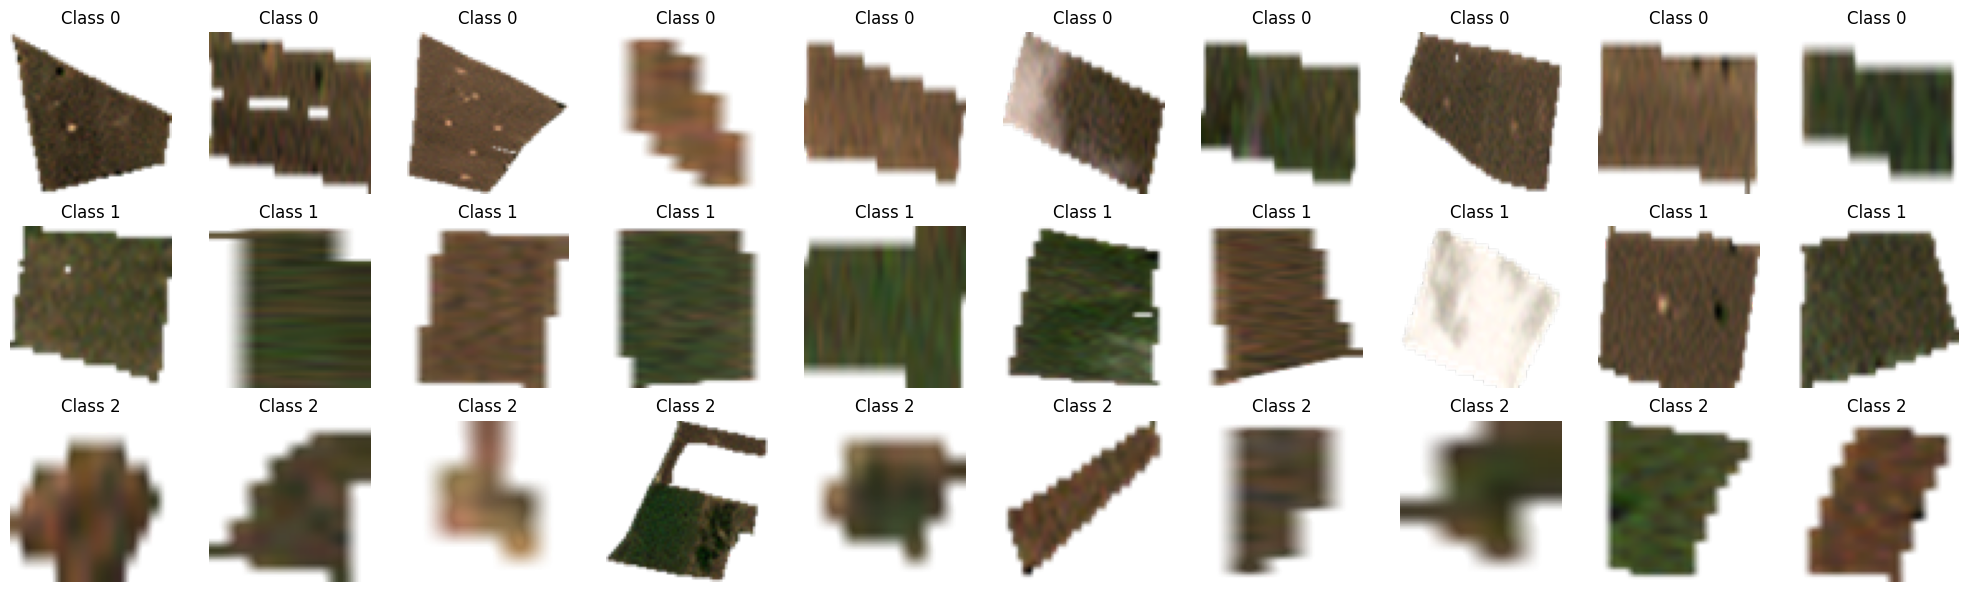

In [21]:
import matplotlib.pyplot as plt
import random

# Assuming X_unlabeled contains the original images
# and labels contain the assigned cluster labels

# Function to display random images from a specific class
def display_images_from_class(class_label, num_images=10):
    indices = [i for i, label in enumerate(labels) if label == class_label]
    selected_indices = random.sample(indices, min(num_images, len(indices)))

    return selected_indices

# Set up subplots
fig, axes = plt.subplots(3, 10, figsize=(20, 6))

# Display images from each class
for class_label in range(3):
    selected_indices = display_images_from_class(class_label)
    for i, idx in enumerate(selected_indices):
        img = X_unlabeled[idx]
        axes[class_label, i].imshow(img)
        axes[class_label, i].set_title(f"Class {class_label}")

        # Hide axes
        axes[class_label, i].axis('off')

plt.tight_layout()
plt.show()


In [10]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_pca, labels)
print(f"Davies-Bouldin Index: {db_index}")


Silhouette Score: 0.25924016398425576
Davies-Bouldin Index: 1.3314005578914665
